<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Classification problems
- Nearest Neighbors (NN, $k$-NN)
- Curse of Dimensionality

<hr/>

### First Midterm

  - Results to be published today or tomorrow.
  - Curving applied: If $x$ is number of raw points obtained out of $50$, <br>
 Points (out of 100) for exam: $f(x)=2\cdot (50^{0.6}\cdot x^{0.4})$.
  - Mean and median: $\approx 30$ in raw points.
  - Mean (in final points): $\approx 80\%$,
  - Median (in final points): $\approx 81.5\%$.

### Group Projects:

 - Groups (5-6 students per group) assigned on Wednesday (Oct 13).
 - More information provided on Wednesday.
 - Project proposal (2 paragraphs) due on **October 25**.

#### Recap of last lectures:
  - (Bayesian) Inference: **Understand relationship** between variables (predictors, and maybe also response variables) and samples.
  - Tools: Prior distribution, likelihood, posterior distribution.

> Example: Understand height of women and men in a certain subpopulation.
   
  - Sampling techniques: Rejection sampling, importance sampling, Metropolis-Hastings,... <br>
  Purpose: Approximate "difficult" posterior distributions.

<h1><font color="darkblue">Classification Problems</font></h1>

Recall:
>|                | Supervised Learning    |         Unsupervised Learning   |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |
 
Examples for **Regression**:
  - Predict house price in a neighborhood based on data from comparable neighborhoods
  - Predict disease progression from patient data and blood sample measurements
  
Examples for **Classification**:
  - Detect spam e-mails: Given e-mail, spam yes/no?
  - Serological COVID-19 test: Patient previously infected yes/no?
  - Recognize digit from image data

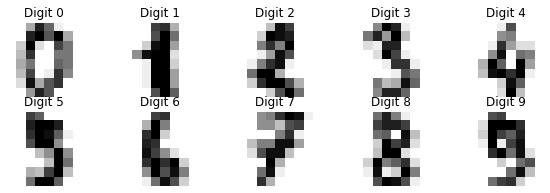

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit %i' % label)

### Setup: Classification

- Based on a **training set** of labeled points, assign _class labels_ to unknown vectors in the **query/test set**.  

> **Training set**
><br><br>
>$T = \big\{ (x_i, y_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $y_i$ is the known class membership.
The class if also often called **label** or **category**.
>  - The classes/labels $y_i$ can take only a (small) number of discrete values.

Examples:  
   - Spam emails: $y_i \in \{0, 1\}$ (**binary classification**): $0$ if no spam, $1$ if spam. <br>
   - Digits: $y_i \in \{0,1,2,3,4,5,6,7,8,9\}$ (**multiclass classification**)
 

> **Query/Test set**
><br><br>
>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$.

Examples:
   - Text of incoming emails
   - Pixels of digits that have not been recognized yet.

### Classification Methods

- **$k$-Nearest Neighbors ($k$-NN)**
- Naive Bayes
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machines

### Example: Iris dataset

Recall the [Iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from Lecture 8 and 9 (08-09-PCABiplots.ipynb).

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris))
[k for k in iris]

<class 'sklearn.utils.Bunch'>


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print (type(iris.data))
print (iris.data.shape)

# have a peek
print (iris.data[:5])
print (iris.target)
type(iris.target_names)

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


numpy.ndarray

In [6]:
for i in range(iris.target_names.size):
    print("Number of samples in Iris class",i,": %i" % (iris.target==0).sum() ,'(',iris.target_names[i],")")

Number of samples in Iris class 0 : 50 ( setosa )
Number of samples in Iris class 1 : 50 ( versicolor )
Number of samples in Iris class 2 : 50 ( virginica )


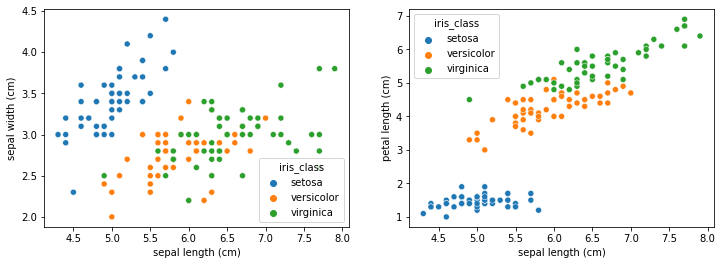

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # use seaborn for plotting instead of matplotlib (often easier interface)

df_iris = pd.DataFrame(iris.data,columns=iris['feature_names']) # define dataframe (easier interface with seaborn)
iris.target_class = []
for k in range(len(iris.target)): # compute list with label names based on class assignment
    iris.target_class.append(iris.target_names[iris.target[k]])
df_iris = df_iris.assign(iris_class=iris.target_class)
fig, axs = plt.subplots(1, 2,figsize=(12, 4))
i,j = 0,1
sns.scatterplot(ax=axs[0],data=df_iris, x=iris.feature_names[i],y=iris.feature_names[j],\
                hue= "iris_class",palette="tab10")
i,j = 0,2
sns.scatterplot(ax=axs[1],data=df_iris, x=iris.feature_names[i],y=iris.feature_names[j],\
                hue= "iris_class",palette="tab10")
plt.show()


### Nearest Neighbor


- Assign label/class of **nearest neighbor** (NN) in the training set

> Simple but powerful
> <br>
> <img src="files/KnnClassification.svg" width=200 align=center>

- *Nearest Neighbor*: If $\{x_1,\ldots,x_n\}$ are predictor vectors of training set, the **nearest neighbor** of $v \in \mathbb{R}^{d}$ is $x_{\pi(v)}$ where 
> $$\pi(v)  = \operatorname{argmin}_{i \in \{1,\ldots, n\}} \|v-x_i\|.$$

In [8]:
import numpy as np
X = iris.data[:,:]
y = iris.target

print ('Unique classes:', np.unique(iris.target))

Unique classes: [0 1 2]


In [9]:
# we implement a simple function that applies classification by the nearest neighbor
def NearestNeighborClassify(X,y):
    y_pred = -1 * np.ones(X.shape[0]) # initialized y_pred with -1, i.e., a class value that does not exist
    for i in np.arange(y.size): 
        d2min = np.inf  # set d2min to infinty 

        # loop on training set
        for j in np.arange(y.size):
            if i != j:               # leave one out
                d = X[i,:] - X[j,:]  # compute vector difference between i-th row of X and j-th row of X.
                d2 = d.dot(d)        # compute squared length of this vector difference
                if d2 < d2min:       # check if closer
                    d2min = d2       # if yes, set this distance as the smallest so far 
                    y_pred[i] = y[j] # ... and assign predicted label accordingly
    return y_pred
y_pred = NearestNeighborClassify(X,y)

In [10]:
print ("Number of mislabeled points out of a total %d points: %d" 
       % (iris.target.size, (y!=y_pred).sum()))
print ("Number of correctly labeled points out of a total %d points: %d" 
       % (iris.target.size, (y==y_pred).sum()))

Number of mislabeled points out of a total 150 points: 6
Number of correctly labeled points out of a total 150 points: 144


### $k$ Nearest Neighbors

- Assign label/class based the **$k$ nearest neighbors** ($k$-NN) in the training set, where $k \in \mathbb{N}$ that is fixed.

> For example, the most frequent "vote" <br/> possibly with weighting
> <br>
> <img src="files/KnnClassification.svg" width=200>

#### Outline of $k$-nearest neighbor classification
- Input: $\{x_1,\ldots,x_n\}$ are predictor vectors of training set, training labels $(y_1,\ldots,y_n)$, predictor vector $x$ of sample to be classified, parameter $k$.

If $\pi_i(x)$ is index of $i$-th closest vector $x_i$ of $x$ among $\{x_1,\ldots,x_n\}$, then set $y_{\text{pred}}$ as the majority label among $\{y_{\pi_1(x)},y_{\pi_2(x)},\ldots,y_{\pi_k(x)}\}$.

- Output: Predicted label $y_{\text{pred}}$ of $x$.

We can also use the k-nearest neighbors classifier of [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = 20
d = 4
X = iris.data[:,:d] # using only the first d features
y = iris.target
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X,y)
y_pred = knn.predict(X)

print("Number of mislabeled points out of a total %d points: %d"
      % (iris.target.size, (iris.target!=y_pred).sum()))

Number of mislabeled points out of a total 150 points: 3


### Where did we "cheat"?

- Can you spot the problem with the setup above?

### Exercise / Unhomework 

- Implement a function that performs $k$-nearest neighbor classification (without using sklearn).

### Create classification maps
To obtain a feeling about what the classifier do, we create classification maps
for different algorithmic parameters (nr. of neighbors considered for KNeighborsClassifier). Since we will call this piece of code several times, we write a function for this.

- Create a mesh of points with resolution $h$
- Plot classification results for each grid point based on training data
- Visualize results
- Do it for different $k$NN classifiers

In [12]:
# creating a grid of points 
gx,gy = np.meshgrid([1,2,3], [10,20])
print (gx)
print (gy)

[[1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]]


In [13]:
gx.ravel(),

(array([1, 2, 3, 1, 2, 3]),)

In [14]:
np.c_[gx.ravel(), gy.ravel()]

array([[ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20]])

In [15]:
def classification_map(X,y,classifier,i=0,j=1,X_test=None,y_test=None,h=0.1):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    classifier.fit(X,y)
    Z = classifier.predict(grid)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # if test set features are provided, overlay classified labels on test set as well
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    ax.legend(["training data","test data"],loc=0,fontsize=8)
    
    return fig

We now seperate the Iris data into training and test set, as usual, using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_#sklearn.model_selection.train_test_split). <br>
_Note:_ Might use optional parameter "stratify" to obtain splits with balanced class label memberships.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,
                                                    test_size=0.2,stratify=y)
print(np.sum(y_train==0))
print(np.sum(y_train==1))
print(np.sum(y_train==2))

40
40
40


Without stratify:

In [17]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,random_state=10,
                                                    test_size=0.2)
print(np.sum(y_train1==0))
print(np.sum(y_train1==1))
print(np.sum(y_train1==2))

40
37
43


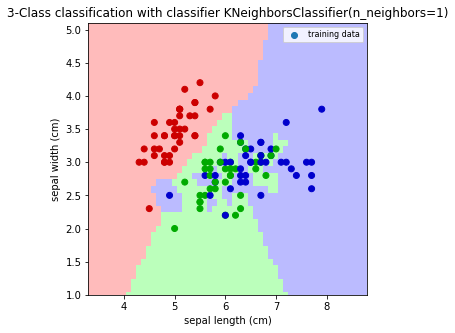

In [18]:
k = 1
import matplotlib.pyplot as plt
features = [0,1] # subset of selected features
knn = KNeighborsClassifier(n_neighbors=k)
classification_map(X_train[:,features],y_train,knn)
plt.xlabel(iris.feature_names[features[0]])
plt.ylabel(iris.feature_names[features[1]])
plt.show()

Note: We did not use all 4 features to "train" the $k$-NN classifier, but only 2.

We now add the test data, and evaluate our predictions.

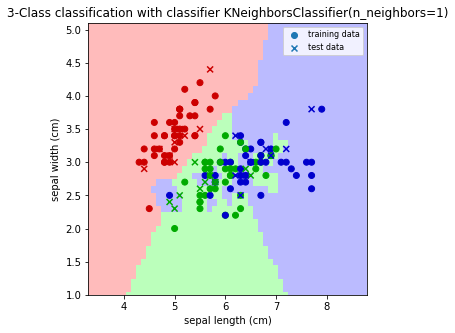

In [19]:
classification_map(X_train[:,features],y_train,knn,X_test=X_test[:,features],y_test=y_test)
plt.xlabel(iris.feature_names[features[0]])
plt.ylabel(iris.feature_names[features[1]])
plt.show()

In [20]:
print("Prediction accuracy for",str(knn),"on the training set: %f" % knn.score(X_train[:,features],y_train))
print("Prediction accuracy for",str(knn),"on the test set: %f" % knn.score(X_test[:,features],y_test))

Prediction accuracy for KNeighborsClassifier(n_neighbors=1) on the training set: 0.925000
Prediction accuracy for KNeighborsClassifier(n_neighbors=1) on the test set: 0.666667


This "score" corresponds to the [accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score), which is often used to assess prediction in classification problems. It represents to the fraction of correctly labeled samples. See also [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

### Exercise / Unhomework 

- Which two features work best to predict the classes of the iris dataset? Which $k$ works best?

Now, we use _all four_ features and perform classification by $k$-NN, despite visualization being difficult.

In [21]:
knnall = KNeighborsClassifier(n_neighbors=k)
knnall.fit(X_train, y_train)
print("Prediction accuracy for",str(knnall),"on the training set: %f" % knnall.score(X_train,y_train))
print("Prediction accuracy for",str(knnall),"on the test set: %f" % knnall.score(X_test,y_test))
k = 6
knnall6 = KNeighborsClassifier(n_neighbors=k)
knnall6.fit(X_train, y_train)
print("Prediction accuracy for",str(knnall6),"on the training set: %f" % knnall6.score(X_train,y_train))
print("Prediction accuracy for",str(knnall6),"on the test set: %f" % knnall6.score(X_test,y_test))
k = 30
knnall30 = KNeighborsClassifier(n_neighbors=k)
knnall30.fit(X_train, y_train)
print("Prediction accuracy for",str(knnall30),"on the training set: %f" % knnall30.score(X_train,y_train))
print("Prediction accuracy for",str(knnall30),"on the test set: %f" % knnall30.score(X_test,y_test))

Prediction accuracy for KNeighborsClassifier(n_neighbors=1) on the training set: 1.000000
Prediction accuracy for KNeighborsClassifier(n_neighbors=1) on the test set: 1.000000
Prediction accuracy for KNeighborsClassifier(n_neighbors=6) on the training set: 0.966667
Prediction accuracy for KNeighborsClassifier(n_neighbors=6) on the test set: 1.000000
Prediction accuracy for KNeighborsClassifier(n_neighbors=30) on the training set: 0.941667
Prediction accuracy for KNeighborsClassifier(n_neighbors=30) on the test set: 0.966667


A helpful tool to visually evaluate the performance of classifiers for a given dataset is the [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix). It presents the counts of how many true labels were correctly predicted, and which classes were wrongly predicted in case the prediction was not correct.

In [22]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['setosa' 'versicolor' 'virginica']


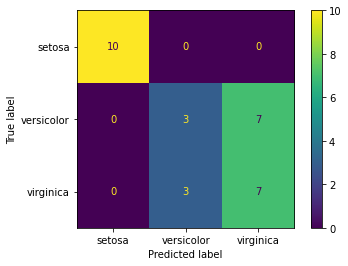

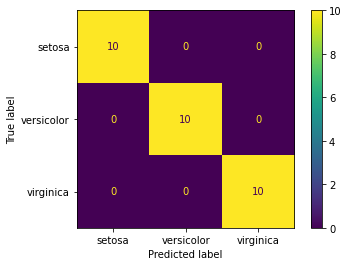

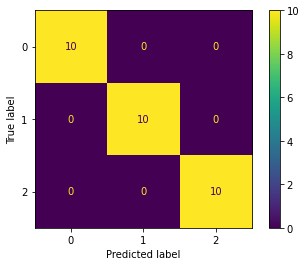

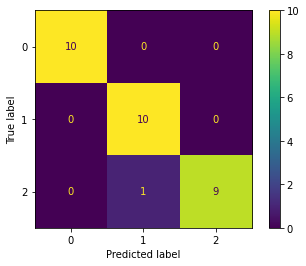

In [23]:
from sklearn import metrics
print (iris['target_names'])
metrics.plot_confusion_matrix(knn,X_test[:,features],y_test)
ax = plt.gca()
ax.set_xticklabels(iris['target_names'])
ax.set_yticklabels(iris['target_names'])                  
metrics.plot_confusion_matrix(knnall,X_test,y_test)
ax = plt.gca()
ax.set_xticklabels(iris['target_names'])
ax.set_yticklabels(iris['target_names'])
metrics.plot_confusion_matrix(knnall6,X_test,y_test)
metrics.plot_confusion_matrix(knnall30,X_test,y_test)

#### Meaningful Distance?

- $k$-NN requires a distance function.

>   - Euclidean distance in $\mathbb{R}^d$ (as above)
>   - $\ell_1$-distance ("Manhattan" distance)
>   - or others.

- Problem with features of different scales.

> In practice, (centering) and **scaling** often helps.


### Strengths and weaknesses of $k$-nearest neighbors

  **+** $k$-NN is a *local* method, and is very simple. <br>
  **+** Often good baseline <br>
  **-** Can be computationally very demanding (needs $n d$ pairwise distances) <br>
  **-** Suffers from *curse of dimensionality* if $d$ is large.

# Curse of Dimensionality

- Everybody is lonely in high dimensions!

### Fewer points per unit cell/ unit volume if $d$ large

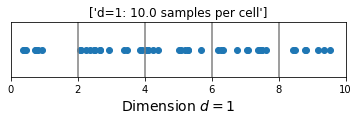

In [24]:
import matplotlib.pyplot as plt
import random
from scipy import stats
import numpy as np

n = 50
fig = plt.figure(figsize=(6,1))
ax  = plt.gca()
x = stats.uniform.rvs(loc=0,scale=10, size=n) 
y = [0 for xval in x]
plt.scatter(x, y)
for grid_pt in [2, 4, 6, 8]:
    plt.axvline(x=grid_pt, color='grey')
ax.set_xlim((0,10))
ax.set_xlabel("Dimension $d=1$", fontsize=14)
ax.set_ylabel("")
plt.yticks([], [])
plt.title(["d=1: "+str(n/5)+" samples per cell"])
plt.show()

Text(0.5, 1.0, "['d=2: 2.0 samples per cell']")

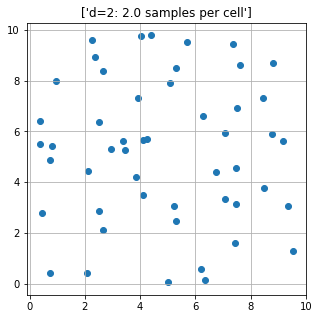

In [25]:

y = stats.uniform.rvs(loc=0,scale=10, size=n)
fig = plt.figure(figsize=(5,5))
ax  = plt.gca()
y = stats.uniform.rvs(loc=0,scale=10, size=n) 
plt.scatter(x, y)
plt.grid()
plt.title(["d=2: "+str(n/(5*5))+" samples per cell"])

### Average distance between random points gets large

In [26]:
n = 500
d = 1
X = stats.uniform.rvs(loc=-1,scale=2, size=(d,n))

In [27]:
Mat_sq = np.sum(np.square(X),0).reshape(1,-1) + np.sum(np.square(X),0).reshape(-1,1)-  2*X.T@(X)
Distfct = lambda X:  np.sqrt(np.max(np.sum(np.square(X),0).reshape(1,-1) + np.sum(np.square(X),0).reshape(-1,1)-  2*X.T@(X),0))

In [28]:
# this formula computes a matrix Dist with Dist(i,j) = \|x_i,x_j\|_2^2
Dist = Distfct(X)

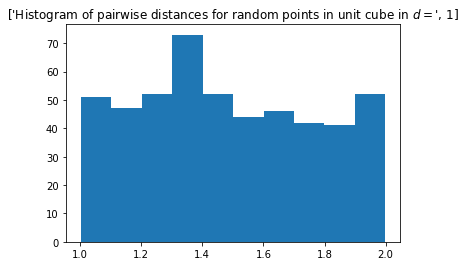

In [29]:
plt.figure()
plt.hist(Dist[:]/np.sqrt(d))
plt.title(["Histogram of pairwise distances for random points in unit cube in $d=$",d])
plt.show()

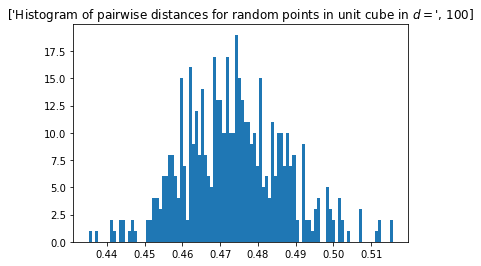

In [30]:
d=100
X = stats.uniform.rvs(loc=0,scale=1, size=(d,n))
Dist = Distfct(X)
plt.figure()
plt.hist(Dist[:]/np.sqrt(d),bins=100)
plt.title(["Histogram of pairwise distances for random points in unit cube in $d=$",d])
plt.show()

We observe that for uniform random points, the resulting pairwise distances are quite spread out for $d=1$ or other small dimensions. Large dimension such as $d=100$ or larger, pairwise distances are very close to each other!

**Curse of dimensionality**, much unintuitive behavior in large dimensions.